In [1]:
import os
import pickle as pkl
import sys
import numpy as np
import pandas as pd
import sklearn
import csv
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS
import seaborn as sns
import ot
import plotly.graph_objs as go
import plotly.express as px
from mpl_toolkits.axes_grid1 import make_axes_locatable
import utilityFunctions
from itertools import combinations
import random
from scipy.stats import pearsonr

In [2]:
# Function to load and process a CSV file into a matrix
def load_csv_to_matrix(file_path, response_type, colour_index, matrix_size):
    df = pd.read_csv(file_path)
    df = df[(df['practice_trial'] != 1) & (df['response_type'] == response_type)]

    colour1 = df['colour1']
    colour2 = df['colour2']
    target_preference = df['response']

    matrix = np.zeros((matrix_size, matrix_size))
    for c1, c2, tp in zip(colour1, colour2, target_preference):
        I = colour_index[c1]
        j = colour_index[c2]
        matrix[I, j] = tp

    return matrix.astype(int)

def get_subject_files(directory):
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]

def compute_average_matrices(group, response_type, colour_index, matrix_size):
    matrices = [load_csv_to_matrix(file, response_type, colour_index, matrix_size) for file in group]
    return np.mean(matrices, axis=0) if matrices else np.zeros((matrix_size, matrix_size))

def compute_correlations(matrices):
    matrix_names = list(matrices.keys())
    correlations = {}
    
    for i in range(len(matrix_names)):
        for j in range(i + 1, len(matrix_names)):
            mat1_name, mat2_name = matrix_names[i], matrix_names[j]
            mat1, mat2 = matrices[mat1_name].flatten(), matrices[mat2_name].flatten()
            correlation, _ = pearsonr(mat1, mat2)
            correlations[f"{mat1_name} vs {mat2_name}"] = correlation
    
    return correlations

In [3]:
# Define unique colors
unique_colours = np.array(['#d2b700', '#db8b08', '#c7512c', '#c13547', '#a03663', '#753a7a', '#4b488e', '#005692', '#006a8b', '#007b75', '#008a52', '#9aa400'])
colour_index = {colour: idx for idx, colour in enumerate(unique_colours)}
matrix_size = len(unique_colours)

In [4]:
directory = 'raw_data/202411_data_without19'
subject_files = get_subject_files(directory)
random.shuffle(subject_files)

half = len(subject_files) // 2
group1, group2 = subject_files[:half], subject_files[half:]

In [5]:
matrices = {
    "Preference Group 1": compute_average_matrices(group1, 'preference', colour_index, matrix_size),
    "Preference Group 2": compute_average_matrices(group2, 'preference', colour_index, matrix_size),
    "Similarity Group 1": compute_average_matrices(group1, 'similarity', colour_index, matrix_size),
    "Similarity Group 2": compute_average_matrices(group2, 'similarity', colour_index, matrix_size),
}

correlations = compute_correlations(matrices)
for key, value in correlations.items():
    print(f"{key}: {value:.4f}")

Preference Group 1 vs Preference Group 2: nan
Preference Group 1 vs Similarity Group 1: nan
Preference Group 1 vs Similarity Group 2: nan
Preference Group 2 vs Similarity Group 1: nan
Preference Group 2 vs Similarity Group 2: nan
Similarity Group 1 vs Similarity Group 2: nan


/var/folders/zk/lv_zrs9910s49_109vbgf6c40000gn/T/ipykernel_93353/1426668485.py:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(mat1, mat2)


In [6]:
def compute_correlations(matrices):
    matrix_names = list(matrices.keys())
    correlation_matrix = np.zeros((len(matrix_names), len(matrix_names)))
    
    for i in range(len(matrix_names)):
        for j in range(i, len(matrix_names)):
            mat1, mat2 = matrices[matrix_names[i]].flatten(), matrices[matrix_names[j]].flatten()
            correlation, _ = pearsonr(mat1, mat2)
            correlation_matrix[i, j] = correlation_matrix[j, i] = correlation
    
    return correlation_matrix, matrix_names

def visualize_correlations(correlation_matrix, matrix_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, xticklabels=matrix_names, yticklabels=matrix_names, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
    plt.title("Correlation Between Preference and Similarity Matrices")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.show()

/var/folders/zk/lv_zrs9910s49_109vbgf6c40000gn/T/ipykernel_93353/1069694279.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(mat1, mat2)
/opt/anaconda3/envs/colorpreferencequalia/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/envs/colorpreferencequalia/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


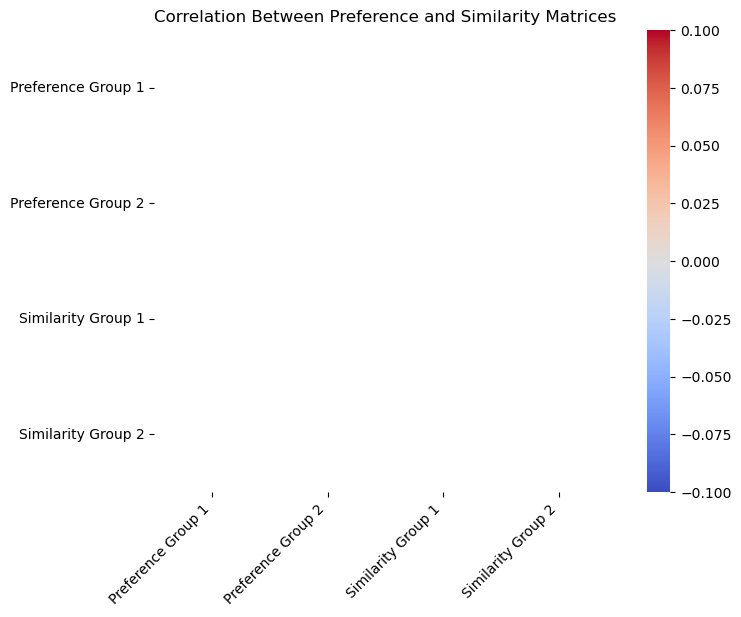

In [7]:
correlation_matrix, matrix_names = compute_correlations(matrices)
visualize_correlations(correlation_matrix, matrix_names)